In [1]:
import os
import glob
import json
import pickle
import pandas as pd

def unnest_pickle(file):
    data = []
    with open(file, 'rb') as fr:
        try:
            while True:
                data.append(pickle.load(fr))
        except EOFError:
            pass
    return [element for innerList in data for element in innerList]

def files_in_dir(path):
    pattern = os.path.join(path)
    file_list = glob.glob(pattern)
    return file_list

def save_JsonFiles(title,data):
    with open(title,'w',encoding='utf-8') as f:
        json.dump(data,f,ensure_ascii=False, indent=2)

def load_JsonFiles(title):
    with open(title,encoding="utf-8") as f:
        return json.load(f)   
    
def merge_JsonFiles(filenames,save_as):
    result = list()
    for f1 in filenames:
        with open(f1, 'r',encoding="utf-8") as infile:
            result.extend(json.load(infile))

    save_JsonFiles(save_as,result)

def save_PickleFiles(title,data):
    with open(title,'wb') as f:
        pickle.dump(data,f)

def load_PickleFiles(title):
    content = []
    with (open(title, 'rb')) as openfile:
        while True:
            try:
                content.append(pickle.load(openfile))
            except EOFError:
                break
    return content

def load_PickleFiles_simple(title):
    with open(title,'rb') as f:
        return pickle.load(f)   
    
def merge_PickleFiles(filenames,save_as):
    result = list()
    for f1 in filenames:
        result.extend(load_PickleFiles(f1))
    save_PickleFiles(save_as,result)

In [ ]:
# done

# import pandas as pd
# import functools as ft

# df_1 = pd.read_csv('data/patent_textdata.csv',names=['publication_number','title_localized','abstract_localized','title','abstract'], usecols = ['publication_number','title','abstract']).copy()
# df_2 = pd.read_csv('data/patent_dates.csv',names=['publication_number','publication_date','grant_date','priority_date'], usecols = ['publication_number','publication_date']).copy()
# df_2.iloc[:,1] = pd.to_datetime(df_2.iloc[:,1])
# df_3 = pd.read_csv('data/patent_details.csv',names=['publication_number','title','abstract','top_terms','country'],usecols = ['publication_number','top_terms','country']).copy()
# df_4 = pd.read_csv('data/patent_assignees.csv',names=['publication_number','assignee','assignee_country']).copy()
# df_5 = pd.read_csv('data/patent_cpc.csv',names=['publication_number','cpc_list','cpc_tree','cpc_all','cpc_nodes'], usecols = ['publication_number','cpc_nodes']).copy()
# df_6 = pd.read_csv('data/patent_ipc.csv',names=['publication_number','ipc_list','ipc_nodes'], usecols = ['publication_number','ipc_nodes']).copy()
# df_7 = pd.read_csv('data/patent_inventors.csv',names=['publication_number','inventor','inventor_country']).copy()
# df_1 = df_1.set_index('publication_number')
# df_2 = df_2.set_index('publication_number')
# df_3 = df_3.set_index('publication_number')
# df_4 = df_4.set_index('publication_number')
# df_5 = df_5.set_index('publication_number')
# df_6 = df_6.set_index('publication_number')
# df_7 = df_7.set_index('publication_number')
# dfs = [df_1, df_2, df_3, df_4, df_5, df_6, df_7] 

# df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='publication_number'), dfs)
# df_final = df_final.reset_index(names='publication_number')
# df = df_final[~df_final['title'].isna()]
# df.to_csv('data/dataset-origin.csv', index=False)
# for i in dfs:
#     del(i)

In [ ]:
# see andira2

def list_to_dict(dataframe,col_index,col_transform):
    processed_dict = dataframe[[col_index,col_transform]].copy()
    processed_dict[col_transform] = processed_dict.loc[:,col_transform].map(lambda x:str(x).replace('[','').replace("'","").replace(']','').split(','))
    with open("output.txt", "a") as text_file:
        print(f"saving {col_transform}", file=text_file)
    save_JsonFiles('data/processed/'+ col_transform +'.json',processed_dict.to_dict('records'))

def lol_to_dict(dataframe,col_index,col_transform):
    processed_dict = dataframe[[col_index,col_transform]].copy()
    processed_dict[col_transform] = processed_dict.loc[:,col_transform].map(lambda x:list(x))
    with open("output.txt", "a") as text_file:
        print(f"saving {col_transform}", file=text_file)
    save_JsonFiles('data/processed/'+ col_transform +'.json',processed_dict.to_dict('records'))

# with open("output.txt", "w") as text_file:
#     print(f"opening dataframe shaped : {df.shape}", file=text_file)

# df = pd.read_csv('data/dataset-origin.csv')
# top_terms_list = list_to_dict(df,col_index='publication_number',col_transform='top_terms')
# assignee_country_list = list_to_dict(df,col_index='publication_number',col_transform='assignee_country')
# cpc_nodes_list = list_to_dict(df,col_index='publication_number',col_transform='cpc_nodes')
# ipc_nodes_list = list_to_dict(df,col_index='publication_number',col_transform='ipc_nodes')
# inventor_country_list = list_to_dict(df,col_index='publication_number',col_transform='inventor_country')
# assignee_list = lol_to_dict(df,col_index='publication_number',col_transform='assignee')
# inventor_list = lol_to_dict(df,col_index='publication_number',col_transform='inventor')

In [5]:
# maybe later


def merge_dicts(*dicts):
    dict_result = {}

    # Merge dictionaries based on 'publication_number'
    for dict_list in dicts:
        for data in dict_list:
            publication_number = data['publication_number']

            # If the publication_number is not in the result dictionary, create a new entry
            if publication_number not in dict_result:
                dict_result[publication_number] = {'publication_number': publication_number}

            # Add or update the other key-value pairs
            dict_result[publication_number].update(data)

    # Convert the result dictionary to a list of dictionaries
    result_list = list(dict_result.values())
    
    return result_list



result_list = merge_dicts(top_terms_list,assignee_country_list,cpc_nodes_list,ipc_nodes_list,inventor_country_list,assignee_list,inventor_list)
result_list[:5]


## Get text data

In [5]:
df = pd.read_csv('../data/dataset-origin.csv').copy()
df.head()

,publication_number,title,abstract,publication_date,top_terms,country,assignee,assignee_country,cpc_nodes,ipc_nodes,inventor,inventor_country
0,US-2016312501-A1,Tailgate inner handle assembly and method of m...,A tailgate inner handle assembly may include a...,2016-10-27 00:00:00,"['tailgate', 'driving wire', 'pulley', 'handle...",United States,"[{'name': 'HYUNDAI MOTOR CO LTD', 'country_cod...",['KR'],"['B60J', 'B60', 'B', 'E05B', 'E05', 'E']","['E05B85/12', 'B60J5/10']","[{'name': 'LEE HO SANG', 'country_code': 'KR'}]",['KR']
1,US-2021332632-A1,Sliding barrier tracking system,Disclosed herein is a sliding door system incl...,2021-10-28 00:00:00,"['barrier', 'sliding door', 'driveshaft', 'mov...",United States,"[{'name': 'OVERHEAD DOOR CORP', 'country_code'...",['US'],"['E05F', 'E05', 'E', 'E05D', 'E05Y']","['E05D15/06', 'E05F15/41', 'E05F15/643']","[{'name': 'ROMERO FEDERICO', 'country_code': '...","['US', 'US']"
2,US-2016003033-A1,Apparatus and methods for monitoring the retri...,A system to monitor the retrieval of a well to...,2016-01-07 00:00:00,"['well tool', 'identification', 'transducer', ...",United States,"[{'name': 'HALLIBURTON ENERGY SERVICES INC', '...",['US'],"['E21B', 'E21', 'E']",['E21B47/09'],"[{'name': 'COLES RANDOLPH S', 'country_code': ...","['US', 'US', 'US']"
3,US-553793-A,Screen for windows or doors,NaN,1896-01-28 00:00:00,"['screen', 'piece', 'cross', 'side pieces', 'd...",United States,[],[],"['E06B', 'E06', 'E']",[],[],[]
4,WO-2009066907-A3,Drill body with air-hammer for inducing revers...,The invention relates to a drill body equipped...,2009-08-06 00:00:00,"['air', 'hammer', 'reverse circulation', 'dril...",WIPO (PCT),"[{'name': 'CORE GEOTECHNICS CO LTD', 'country_...","['KR', 'KR']","['E21B', 'E21', 'E']","['E21B10/66', 'E21B10/36', 'E21B10/00']","[{'name': 'PARK SUN KEUN', 'country_code': 'KR'}]",['KR']


In [2]:
import pandas as pd
from tqdm import tqdm
import os
import glob
import pathlib
import datetime
import ast

def split_by_phases(df,phase):
    
    for num, y in tqdm(enumerate(phase)):
        if num+1<len(phase):
            df[(df['publication_date']>=datetime.datetime(y, 1, 1)) & (df['publication_date']<datetime.datetime(phase[num+1], 1, 1))].to_csv(f'../data/Phase-{num+1}_({y}).csv', index=False)
            print(f'Phase-{num+1}: Done')
        else:
            df[(df['publication_date']>=datetime.datetime(y, 1, 1))].to_csv(f'../data/Phase-{num+1}_({y}).csv', index=False)
            print(f'Phase-{num+1}: Done')

def combine_text(path):
    temp_df = pd.DataFrame()
    for chunk in tqdm(pd.read_csv(path,encoding='utf-8', usecols = ['publication_number','publication_date','title','top_terms'],chunksize=1000)):
        chunk['title'] = chunk['title'].fillna('')
        chunk['top_terms'] = chunk['top_terms'].fillna('').apply(ast.literal_eval)
        chunk['title'] = chunk['title'].map(lambda x:x.split())
        chunk['tokens'] = chunk['title'] + chunk['top_terms']
        chunk = chunk.drop(columns=['title','top_terms'])
        temp_df = pd.concat([temp_df, chunk],ignore_index=True)
    # temp_df.to_csv(path[:8]+path[8:-4]+'-tokens.csv',index=False)
    save_JsonFiles(path[:-4]+'-tokens.json',temp_df.to_dict('records'))


# # for later

# def country_network(path):
#     temp_df = pd.DataFrame()
#     for chunk in tqdm(pd.read_csv(path,encoding='utf-8', usecols = ['publication_number','publication_date','assignee_country'],chunksize=1000)):
#         chunk['assignee_country'] = chunk['assignee_country'].fillna('')
  
#         chunk = chunk.drop(columns=['title','top_terms'])
#         temp_df = pd.concat([temp_df, chunk],ignore_index = True)
#     temp_df.to_csv(path[:8]+"/processed/"+path[8:-4]+'-new.csv',index=False)

# MASTER WORD CO_OCCURRENCE

# import numpy as np
# import itertools
# from scipy.sparse import csr_matrix


# def create_co_occurences_matrix(allowed_words, documents):
#     print(f"allowed_words:\n{allowed_words}")
#     print(f"documents:\n{documents}")
#     word_to_id = dict(zip(allowed_words, range(len(allowed_words))))
#     documents_as_ids = [np.sort([word_to_id[w] for w in doc if w in word_to_id]).astype('uint32') for doc in documents]
#     row_ind, col_ind = zip(*itertools.chain(*[[(i, w) for w in doc] for i, doc in enumerate(documents_as_ids)]))
#     data = np.ones(len(row_ind), dtype='uint32')  # use unsigned int for better memory utilization
#     max_word_id = max(itertools.chain(*documents_as_ids)) + 1
#     docs_words_matrix = csr_matrix((data, (row_ind, col_ind)), shape=(len(documents_as_ids), max_word_id))  # efficient arithmetic operations with CSR * CSR
#     words_cooc_matrix = docs_words_matrix.T * docs_words_matrix  # multiplying docs_words_matrix with its transpose matrix would generate the co-occurences matrix
#     words_cooc_matrix.setdiag(0)
#     print(f"words_cooc_matrix:\n{words_cooc_matrix.todense()}")
#     return words_cooc_matrix, word_to_id 

# allowed_words = ['A', 'B', 'C', 'D']
# documents = [['A', 'B'], ['C', 'B', 'K'],['A', 'B', 'C', 'D', 'Z']]
# words_cooc_matrix, word_to_id = create_co_occurences_matrix(allowed_words, documents)

,publication_number,title,abstract,publication_date,top_terms,country,assignee,assignee_country,cpc_nodes,ipc_nodes,inventor,inventor_country,text
0,US-2016312501-A1,"[Tailgate, inner, handle, assembly, and, metho...",A tailgate inner handle assembly may include a...,2016-10-27 00:00:00,"[tailgate, driving wire, pulley, handle assemb...",United States,"[{'name': 'HYUNDAI MOTOR CO LTD', 'country_cod...",['KR'],"['B60J', 'B60', 'B', 'E05B', 'E05', 'E']","['E05B85/12', 'B60J5/10']","[{'name': 'LEE HO SANG', 'country_code': 'KR'}]",['KR'],"[Tailgate, inner, handle, assembly, and, metho..."
1,US-2021332632-A1,"[Sliding, barrier, tracking, system]",Disclosed herein is a sliding door system incl...,2021-10-28 00:00:00,"[barrier, sliding door, driveshaft, movement, ...",United States,"[{'name': 'OVERHEAD DOOR CORP', 'country_code'...",['US'],"['E05F', 'E05', 'E', 'E05D', 'E05Y']","['E05D15/06', 'E05F15/41', 'E05F15/643']","[{'name': 'ROMERO FEDERICO', 'country_code': '...","['US', 'US']","[Sliding, barrier, tracking, system, barrier, ..."
2,US-2016003033-A1,"[Apparatus, and, methods, for, monitoring, the...",A system to monitor the retrieval of a well to...,2016-01-07 00:00:00,"[well tool, identification, transducer, tool, ...",United States,"[{'name': 'HALLIBURTON ENERGY SERVICES INC', '...",['US'],"['E21B', 'E21', 'E']",['E21B47/09'],"[{'name': 'COLES RANDOLPH S', 'country_code': ...","['US', 'US', 'US']","[Apparatus, and, methods, for, monitoring, the..."
3,US-553793-A,"[Screen, for, windows, or, doors]",NaN,1896-01-28 00:00:00,"[screen, piece, cross, side pieces, doors, win...",United States,[],[],"['E06B', 'E06', 'E']",[],[],[],"[Screen, for, windows, or, doors, screen, piec..."
4,WO-2009066907-A3,"[Drill, body, with, air-hammer, for, inducing,...",The invention relates to a drill body equipped...,2009-08-06 00:00:00,"[air, hammer, reverse circulation, drill, dril...",WIPO (PCT),"[{'name': 'CORE GEOTECHNICS CO LTD', 'country_...","['KR', 'KR']","['E21B', 'E21', 'E']","['E21B10/66', 'E21B10/36', 'E21B10/00']","[{'name': 'PARK SUN KEUN', 'country_code': 'KR'}]",['KR'],"[Drill, body, with, air-hammer, for, inducing,..."


In [8]:
# text corpus per phase

import pandas as pd
from tqdm import tqdm
import datetime
import pathlib
# from data_prep import split_by_phases
# from data_prep import combine_text
# from data_prep import files_in_dir
import logging
import ast

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',  datefmt= '%H:%M:%S', level=logging.INFO)

# df = pd.read_csv('../data/dataset-origin.csv').copy()
# df['publication_date'] = pd.to_datetime(df['publication_date'])
# phase = [2018,2019,2020,2021,2022]
# split_by_phases(df,phase)

path = "../data/Phase-*).csv"
pathlib.Path("../data/processed").mkdir(exist_ok=True)

for file in tqdm(files_in_dir(path)):
    combine_text(file.replace('\\','/'))


  0%|          | 0/5 [00:00<?, ?it/s]

188it [00:21,  8.80it/s]
181it [00:19,  9.10it/s]:36<02:24, 36.21s/it]
207it [00:22,  9.03it/s]:10<01:44, 34.85s/it]
221it [00:27,  8.15it/s]:49<01:13, 36.96s/it]
252it [00:29,  8.48it/s]:33<00:39, 39.85s/it]
100%|██████████| 5/5 [03:23<00:00, 40.76s/it]


In [3]:

import pandas as pd
import ast
import spacy
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import pickle
# Enable logging for gensim - optional
import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',  datefmt= '%H:%M:%S', level=logging.ERROR)

def sentence_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def remove_stopwords(texts):
    stop_words = stopwords.words('english')
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def convert_dataframe(data:list):
    return list(sentence_to_words(data))

def create_training_corpus(df):
    data_words = convert_dataframe(df)
    return [' '.join(words) for words in data_words]

def create_lda_corpus(data):
    data_words = convert_dataframe(data)
    data_words_nostops = remove_stopwords(data_words)
    return [' '.join(words) for words in data_words_nostops]
    # python -m spacy download en_core_web_sm
    data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    return [' '.join(words) for words in data_lemmatized]

#To load from pickle file
def unnest_pickle(file):
    data = []
    with open(file, 'rb') as fr:
        try:
            while True:
                data.append(pickle.load(fr))
        except EOFError:
            pass
    return [element for innerList in data for element in innerList]


In [13]:
from __future__ import annotations

from typing import List

from pydantic import BaseModel,RootModel


class ModelItem(BaseModel):
    publication_number: str
    publication_date: str
    tokens: List[str]


class Model(BaseModel):
    RootModel: List[ModelItem]


In [18]:
# done
from gensim.models import Word2Vec
from itertools import chain

path_ = "../data/Phase-*"+"tokens.json"

# # lda corpus
# for file in files_in_dir(path_):
#     data = load_JsonFiles(file)
#     patents = [ModelItem(**item) for item in data]
#     list_p = [' '.join(p.tokens) for p in patents]

#     for items in list_p:
#         with open(file[:-11]+'-lda_dataset.pkl', 'ab+') as fp:
#             pickle.dump(items, fp)



path_pkl = "../data/*-lda_dataset.pkl"
global_dat = '../data/processed/global'+path_pkl[-16:] 

# # w2v training corpus
# merge_PickleFiles(files_in_dir(path_pkl),global_dat)

sentences = load_PickleFiles_simple(global_dat)
sentences = [line.split() for line in list(chain(*sentences))]


In [16]:
# construct_global_corpus.py
# done

from itertools import chain
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
from tqdm import tqdm

path_pkl = "../data/processed/*lda_dataset.pkl"

# corpus = []
# for file in files_in_dir(path_pkl):
#     local = unnest_pickle(file)
#     corpus.extend(local)

corpus = load_PickleFiles_simple('../data/processed/global-lda_dataset.pkl')
data_global_words = [line.split() for line in corpus]
# data_global_words = [simple_preprocess(doc) for doc in corpus]
index_global_word = gensim.corpora.Dictionary(data_global_words)
print("saving gensim dictionary")
index_global_word.filter_extremes(no_below=100, no_above=0.5, keep_n=100000)
index_global_word.save("filtered_global_index.dictionary")
BoW_corpus = [index_global_word.doc2bow(doc, allow_update=True) for doc in tqdm(data_global_words)]
corpora.MmCorpus.serialize('filtered_global_corpus.mm', BoW_corpus)

saving gensim dictionary


100%|██████████| 1047176/1047176 [00:45<00:00, 22814.08it/s]


In [19]:
len(index_global_word)

126287

In [17]:
# construct_local_corpus.py
# done

from itertools import chain
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
from itertools import chain

path_pkl = "../data/*-lda_dataset.pkl"
id2word = corpora.Dictionary.load("filtered_global_index.dictionary")

for file in files_in_dir(path_pkl):
    year = file.split('--')[0][-5:-1]
    corpus = load_PickleFiles(file)
    print(len(corpus))
    data_words = [line.split() for line in corpus]
    local_index = gensim.corpora.Dictionary(data_words)
    BoW_corpus = [id2word.doc2bow(token, allow_update=True) for token in data_words]
    local_index.save("filtered_local_index-"+year+".dictionary")
    corpora.MmCorpus.serialize("filtered_local_corpus-"+year+".mm", BoW_corpus)

187664
180736
206582
220297
251897


#### Kalo sudah dapet parameter LDA

In [47]:
from itertools import chain
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
from tqdm import tqdm

import random
random.sample(range(1, 1000000), 3)


corps = corpora.MmCorpus('global_corpus.mm')
id2word = corpora.Dictionary.load("global_index.dictionary")
print(len(id2word))
# id2word.filter_extremes(no_below=100, no_above=0.5, keep_n=100000)

model = gensim.models.ldamodel.LdaModel(id2word=id2word ,num_topics=10,passes=5,chunksize=50)
partition = 100  # len(corps) // 1000
list_taken = random.sample(range(1, 1000000), 5000)
for i in range(50): 
    starting = i*partition # 0,100,200
    end = (i+1)*partition
    model.update(corpus=corps[list_taken[starting:end]],decay=0.5,offset=1)
    print(f"iteration number {i+1} done")

# model.id2word = id2word


model.log_perplexity(list(corps))

# https://stackoverflow.com/questions/51735011/should-the-perplexity-or-score-go-up-or-down-in-the-lda-implementation-of

126287
iteration number 1 done
iteration number 2 done
iteration number 3 done
iteration number 4 done
iteration number 5 done
iteration number 6 done
iteration number 7 done
iteration number 8 done
iteration number 9 done
iteration number 10 done
iteration number 11 done
iteration number 12 done
iteration number 13 done
iteration number 14 done
iteration number 15 done
iteration number 16 done
iteration number 17 done
iteration number 18 done
iteration number 19 done
iteration number 20 done
iteration number 21 done
iteration number 22 done
iteration number 23 done
iteration number 24 done
iteration number 25 done
iteration number 26 done
iteration number 27 done
iteration number 28 done
iteration number 29 done
iteration number 30 done
iteration number 31 done
iteration number 32 done
iteration number 33 done
iteration number 34 done
iteration number 35 done
iteration number 36 done
iteration number 37 done
iteration number 38 done
iteration number 39 done
iteration number 40 done
it

-10.023114853880369

In [41]:
len(list(corps))

1047176

In [37]:
corpus = load_PickleFiles_simple('../data/processed/global-lda_dataset.pkl')
data_global_words = [line.split() for line in corpus]

In [1]:
import logging
import ast
from datetime import datetime, timezone, timedelta
tzinfo = timezone(timedelta(hours=+7.0))
import gensim
import pathlib
import pickle
import json
# corpus extraction
from gensim.models import Word2Vec
from itertools import chain
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
from random import sample

In [27]:
corpus = load_PickleFiles_simple('../data/processed/global_lda_tuning.pkl')
corpus[:5]

[['Pipeline',
  'pit',
  'hole',
  'lifting',
  'equipment',
  'for',
  'road',
  'bridge',
  'construction',
  'pipeline',
  'plate',
  'bridge',
  'construction',
  'road',
  'rotating',
  'shaft',
  'arc',
  'pull',
  'rope',
  'common',
  'frame',
  'pot',
  'hole',
  'pawl'],
 ['Heat',
  'shield',
  'device,',
  'heat',
  'shield',
  'film,',
  'and',
  'heat',
  'shielding',
  'composition',
  'heat',
  'shield',
  'film',
  'particles',
  'heat',
  'shield',
  'device',
  'electrons',
  'holes',
  'infrared',
  'outside',
  'acceptor'],
 ['Large',
  'prefabricated',
  'part',
  'introducing',
  'and',
  'hoisting',
  'device',
  'and',
  'construction',
  'method',
  'thereof',
  'chain',
  'block',
  'component',
  'main',
  'upright',
  'upright',
  'post',
  'bottom',
  'beam',
  'hoisting',
  'device',
  'connecting',
  'plate',
  'introducing',
  'welded',
  'lug'],
 ['Underground',
  'space',
  'escape',
  'system',
  'and',
  'tunnel',
  'structure',
  'belt',
  'pipe',
 

In [39]:
from pprint import pprint
pprint(corps[:5])

In [49]:
model.save('lda_model_trial')


In [ ]:
lda_model = model.load('lda_model_trial')

In [50]:
from pprint import pprint
topic_words = lda_model.show_topics(num_words=20)
# pprint([item[1] for item in topic_words])
probability = [[float(num.split("*")[0]) for num in item[1].split(" + ")] for item in topic_words] # list of list of float
w_vec_top = [[num.split("*")[1].strip('"').lower() for num in item[1].split(" + ")] for item in topic_words] # list of list of string

In [51]:
topic_words

[(0,
  '0.023*"lock" + 0.023*"body" + 0.018*"vehicle" + 0.016*"protection" + 0.014*"section" + 0.013*"cylinder" + 0.013*"bar" + 0.013*"mounting" + 0.012*"end" + 0.012*"road" + 0.012*"key" + 0.011*"hinge" + 0.009*"main" + 0.009*"portion" + 0.009*"spring" + 0.008*"turbine" + 0.007*"opening" + 0.007*"driver" + 0.007*"barrier" + 0.006*"mechanism"'),
 (1,
  '0.027*"member" + 0.015*"module" + 0.009*"manufacturing" + 0.008*"wellbore" + 0.001*"Wear" + 0.001*"retainer" + 0.001*"biasing" + 0.000*"emulsion" + 0.000*"contacting" + 0.000*"Wet-coated" + 0.000*"sma" + 0.000*"ether" + 0.000*"glycidyl" + 0.000*"grasp" + 0.000*"chip" + 0.000*"servicing" + 0.000*"heatable" + 0.000*"defining" + 0.000*"blend" + 0.000*"abnormality"'),
 (2,
  '0.032*"and" + 0.022*"for" + 0.021*"of" + 0.019*"device" + 0.016*"method" + 0.015*"wall" + 0.014*"system" + 0.009*"machine" + 0.008*"rod" + 0.008*"layer" + 0.008*"a" + 0.006*"bridge" + 0.006*"A" + 0.006*"assembly" + 0.005*"drilling" + 0.005*"shaft" + 0.005*"floor" + 0.0

In [52]:
w_vec_top[3]

['parts',
 'rapid',
 'composition',
 'releasing',
 'mill',
 'ingot',
 'heatable',
 'electrically',
 'packaging',
 'pva',
 'pva',
 'mma',
 'molecular',
 'mma',
 'fibers',
 'copolymer',
 'precise',
 'stratosphere',
 'examples',
 '(self-deployable']

In [54]:
probability

[[0.023,
  0.023,
  0.018,
  0.016,
  0.014,
  0.013,
  0.013,
  0.013,
  0.012,
  0.012,
  0.012,
  0.011,
  0.009,
  0.009,
  0.009,
  0.008,
  0.007,
  0.007,
  0.007,
  0.006],
 [0.027,
  0.015,
  0.009,
  0.008,
  0.001,
  0.001,
  0.001,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.032,
  0.022,
  0.021,
  0.019,
  0.016,
  0.015,
  0.014,
  0.009,
  0.008,
  0.008,
  0.008,
  0.006,
  0.006,
  0.006,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.004],
 [0.016,
  0.004,
  0.004,
  0.002,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.006,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.05,
  0.034,
  0.02,
  0.018,
  0.015,
  0.014,
  0.012,
  0.012,
  0.01,
  0.01,
  0.009,
  0.008,
  0.007,
  0.007,
  0.006,
  0.005,
  0.005,
  0.004,
  0.004,
  0.003],
 [0.033,
  0.0

In [69]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np

# Load back with memory-mapping = read-only, shared across processes.
model_wv = Word2Vec.load("word2vec_model.bin")
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')

def vectorize_topics(lda_model):
    topic_words = lda_model.show_topics(num_words=20)
    probability = [[float(num.split("*")[0]) for num in item[1].split(" + ")] for item in topic_words] # list of list of float
    w_vec_top = [[num.split("*")[1].strip('"').lower() for num in item[1].split(" + ")] for item in topic_words] # list of list of string

    topvec_list = []
    for i in range(len(topic_words)):
        topic = w_vec_top[i]
        p = probability[i]
        topic_vector = np.zeros(300)
        for n in range(len(topic)):
            try:
                topic_vector = topic_vector + wv.get_vector(topic[n])*p[n]
            except:
                array_word = topic[n].replace('(','').replace(')','').replace(' ','_').replace('-','_').split("_")
                topic_vector = topic_vector + wv.get_mean_vector(array_word)*p[n]
        topvec_list.append(topic_vector)
    
    return list(zip([item[0] for item in topic_words],
                    topvec_list,
                    [item[1] for item in topic_words]))

# wv_list = []        
# for topic in w_vec_top:
#     topic_array=[]
#     for item in topic:
#         try:
#             topic_array.append(wv.get_vector(item))
#         except:
#             array_word = item.replace(' ','_').replace('-','_').split("_")
#             topic_array.append(wv.get_mean_vector(array_word))
#     wv_list.append(topic_array)

# len(wv_list[0][0])


In [92]:
for n, coherence_values,perplexity_values in load_PickleFiles_simple('../data/processed/2022_topic-evaluation.pkl'):
    print(coherence_values)

In [4]:
import random
corps = corpora.MmCorpus('global_corpus.mm')
id2word = corpora.Dictionary.load("global_index.dictionary")
print('so far so good')
model = gensim.models.ldamodel.LdaModel(
                                        id2word=id2word,
                                        passes=20,
                                        chunksize=20,
                                        num_topics=10
                                        )

llll = list(range(10))
random.shuffle(llll)
for i in llll:
    try:
        dataset = corps[i * 100: (i + 1) * 100]
    except:
        dataset = corps[i * 100: (i + 1) * 100 -1]
    finally:
        model.update(
            corpus=dataset,
            decay=0.7,
            offset=1
            )
        print('yes')
    print(f'iteration {i} done')

so far so good
yes
iteration 9 done
yes
iteration 4 done
yes
iteration 2 done
yes
iteration 1 done
yes
iteration 8 done
yes
iteration 0 done
yes
iteration 5 done
yes
iteration 6 done
yes
iteration 3 done
yes
iteration 7 done


In [23]:
for i in wv_list[0]:
    print(len(i))

300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300


In [110]:
strrr = 'ubuntu/model/filtered_local_corpus-2020.mm'
strrr[-7:-3]

'2020'

In [31]:
probability

[[0.053,
  0.019,
  0.011,
  0.011,
  0.007,
  0.007,
  0.007,
  0.005,
  0.004,
  0.003,
  0.002,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001],
 [0.036,
  0.027,
  0.026,
  0.013,
  0.007,
  0.007,
  0.006,
  0.005,
  0.005,
  0.003,
  0.003,
  0.002,
  0.002,
  0.002,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.

In [24]:
for i in probability[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [12]:
from pprint import pprint
pprint(lda_model.print_topics(num_words=20))


[(0,
  '0.000*"privacy" + 0.000*"features" + 0.000*"acoustic" + 0.000*"heading" + '
  '0.000*"implement" + 0.000*"entry" + 0.000*"tools" + 0.000*"offshore" + '
  '0.000*"excavating" + 0.000*"Excavating" + 0.000*"curl" + 0.000*"swing" + '
  '0.000*"linkage" + 0.000*"excavator" + 0.000*"stick" + 0.000*"user" + '
  '0.000*"visual" + 0.000*"Visual" + 0.000*"speakers" + 0.000*"configuration"'),
 (1,
  '0.000*"privacy" + 0.000*"features" + 0.000*"acoustic" + 0.000*"heading" + '
  '0.000*"implement" + 0.000*"entry" + 0.000*"tools" + 0.000*"offshore" + '
  '0.000*"excavating" + 0.000*"Excavating" + 0.000*"curl" + 0.000*"swing" + '
  '0.000*"linkage" + 0.000*"excavator" + 0.000*"stick" + 0.000*"user" + '
  '0.000*"visual" + 0.000*"Visual" + 0.000*"speakers" + 0.000*"configuration"'),
 (2,
  '0.015*"structure" + 0.014*"assembly" + 0.014*"layer" + 0.007*"pressure" + '
  '0.007*"according" + 0.007*"member" + 0.005*"panel" + 0.004*"base" + '
  '0.003*"heading" + 0.003*"implement" + 0.003*"canopy" +

In [33]:
pprint(len(lda_model.get_topics()[1]))


8225


In [25]:
for i in range(10):
    pprint(lda_model.get_topic_terms(i,topn=20))

[(1013, 0.03431097),
 (581, 0.027263446),
 (915, 0.025383232),
 (1125, 0.025142366),
 (58, 0.024551746),
 (6314, 0.023235027),
 (2946, 0.02223949),
 (250, 0.021574764),
 (2687, 0.019487),
 (6315, 0.015502095),
 (2091, 0.0148867),
 (5743, 0.013131662),
 (1775, 0.012112689),
 (3040, 0.01057767),
 (690, 0.0100814225),
 (2210, 0.009199129),
 (1754, 0.008611859),
 (6333, 0.008480139),
 (6334, 0.008480139),
 (1714, 0.008480139)]
[(6351, 0.00012159149),
 (52, 0.00012158877),
 (4647, 0.00012158877),
 (6382, 0.00012158404),
 (5490, 0.00012158404),
 (4229, 0.00012158393),
 (500, 0.00012158347),
 (2983, 0.00012158347),
 (6352, 0.00012158347),
 (6350, 0.00012158347),
 (230, 0.000121583296),
 (701, 0.00012158328),
 (4097, 0.00012158273),
 (769, 0.00012158273),
 (6371, 0.000121582634),
 (1212, 0.00012158263),
 (6341, 0.00012158251),
 (6342, 0.00012158251),
 (2585, 0.00012158245),
 (6299, 0.00012158245)]
[(38, 0.04458796),
 (47, 0.042979278),
 (42, 0.041967724),
 (323, 0.04110086),
 (176, 0.018943096

## Topic Vector

In [8]:
from itertools import chain
from itertools import product 
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim
from tqdm import tqdm
from numpy import linalg
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

#done
# list_model = files_in_dir("../model/*_lda.model")
# list_topvec = files_in_dir("../model/2*_topic_vector.pkl")

# col_1 = []
# col_2 = []
# col_3 = []
# for n,file in enumerate(list_topvec):
#     name = file[9:-17]  
#     tv = load_PickleFiles_simple(file.replace('\\','/'))
#     tv_array = [item[1] for item in tv]
#     key, val, non = zip(*tv)
#     tv_dict = {name+"_"+str(k):v for (k,v) in zip(key,val)}
#     if n+1 < len(list_topvec):
#         name_next = list_topvec[n+1][9:-17]
#         next_tv = load_PickleFiles_simple(list_topvec[n+1].replace('\\','/'))
#         next_tv_array = [item[1] for item in next_tv]
#         key, val, non = zip(*next_tv)
#         next_tv_dict = {name_next+"_"+str(k):v for (k,v) in zip(key,val)}
#         top_2_top = list(product(list(tv_dict.keys()),list(next_tv_dict.keys())))
#         for pairing in tqdm(top_2_top):
#             arr_1 = np.array(tv_dict[pairing[0]]).reshape(1, -1)
#             arr_2 = np.array(next_tv_dict[pairing[1]]).reshape(1, -1)
#             col_1.append(pairing[0])
#             col_2.append(pairing[1])
#             col_3.append(cosine_similarity(arr_1,arr_2)[0][0])
#     else:
#         continue
# similarity_score = pd.DataFrame(
#             {'topic_prev':col_1,
#             'topic_next':col_2,
#             'similarity':col_3
#             }
#         )
# similarity_score.to_csv('../data/processed/periodic_topic_evolution.csv',index=False)


# # global to local
# glob_topvec = load_PickleFiles_simple("../model/global_topic_vector.pkl")
# glob_topvec_array = [item[1] for item in glob_topvec]
# key, val, non = zip(*glob_topvec)
# glob_topvec_dict = {"global"+"_"+str(k):v for (k,v) in zip(key,val)}

# col_1 = []
# col_2 = []
# col_3 = []
# for n,file in enumerate(list_topvec):
#     name = file[9:-17]  
#     tv = load_PickleFiles_simple(file.replace('\\','/'))
#     tv_array = [item[1] for item in tv]
#     key, val, non = zip(*tv)
#     tv_dict = {name+"_"+str(k):v for (k,v) in zip(key,val)}
#     top_2_top = list(product(list(glob_topvec_dict.keys()),list(tv_dict.keys())))
#     for pairing in tqdm(top_2_top):
#         arr_1 = np.array(glob_topvec_dict[pairing[0]]).reshape(1, -1)
#         arr_2 = np.array(tv_dict[pairing[1]]).reshape(1, -1)
#         col_1.append(pairing[0])
#         col_2.append(pairing[1])
#         col_3.append(cosine_similarity(arr_1,arr_2)[0][0])
# similarity_score = pd.DataFrame(
#             {'topic_global':col_1,
#             'topic_local':col_2,
#             'similarity':col_3
#             }
#         )
# similarity_score.to_csv('../data/processed/global_local_similarity.csv',index=False)



In [10]:
# !pip install seaborn
import seaborn as sns

df = pd.read_csv('../data/processed/periodic_topic_evolution.csv')
df.columns = ['source', 'target', 'weight']
print(df.head())
unique_nodes = list(pd.unique(df[['source', 'target']].values.ravel('K')))
print(unique_nodes[:5])
index = {k:v for v,k in enumerate(unique_nodes)}
print(index)
index_inv = {v: k for k, v in index.items()}
print(index_inv)
df['source'] = df['source'].map(index)
df['target'] = df['target'].map(index) 
df_dict = df.to_dict(orient='list')
color_palette = sns.color_palette('Pastel2', len(df)).as_hex()
len(color_palette)




   source   target  weight
0  2018_8  2019_19     0.0
1  2018_8  2019_18     0.0
2  2018_8  2019_12     0.0
3  2018_8  2019_11     0.0
4  2018_8   2019_6     0.0
['2018_8', '2018_17', '2018_11', '2018_0', '2018_12']
{'2018_8': 0, '2018_17': 1, '2018_11': 2, '2018_0': 3, '2018_12': 4, '2018_5': 5, '2018_9': 6, '2018_3': 7, '2018_2': 8, '2018_18': 9, '2019_19': 10, '2019_18': 11, '2019_12': 12, '2019_11': 13, '2019_6': 14, '2019_13': 15, '2019_4': 16, '2019_1': 17, '2019_10': 18, '2019_5': 19, '2020_19': 20, '2020_8': 21, '2020_5': 22, '2020_12': 23, '2020_3': 24, '2020_14': 25, '2020_0': 26, '2020_15': 27, '2020_7': 28, '2020_6': 29, '2021_0': 30, '2021_8': 31, '2021_3': 32, '2021_15': 33, '2021_10': 34, '2021_4': 35, '2021_7': 36, '2021_16': 37, '2021_11': 38, '2021_17': 39, '2022_18': 40, '2022_16': 41, '2022_12': 42, '2022_9': 43, '2022_13': 44, '2022_4': 45, '2022_19': 46, '2022_3': 47, '2022_7': 48, '2022_15': 49}
{0: '2018_8', 1: '2018_17', 2: '2018_11', 3: '2018_0', 4: '2018_12',

400

In [23]:
len(df)

400

In [22]:
len(df_dict['source'])

400

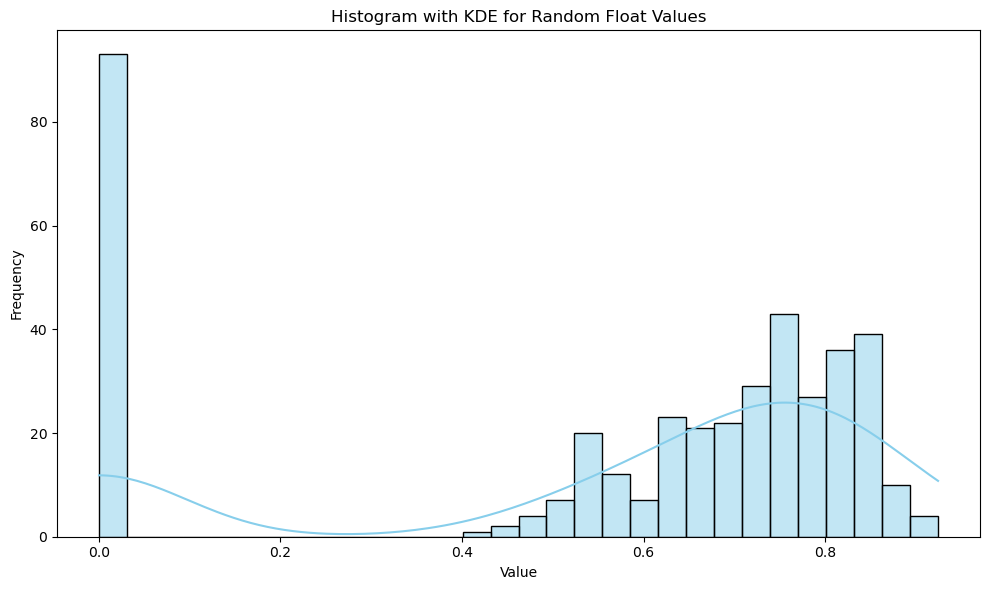

In [17]:
# Plots the histogram for each numerical feature in a separate subplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a Pandas Series with random float values
data = df['weight']  # 1000 random float values

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot histogram with seaborn
sns.histplot(data, kde=True, color='skyblue', bins=30)  # kde=True adds the KDE plot
plt.title('Histogram with KDE for Random Float Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [13]:
df['weight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: weight
Non-Null Count  Dtype  
--------------  -----  
400 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [4]:
# !pip install nbformat
# !pip install plotly
import plotly.express as px
import plotly.graph_objects as go


fig = go.Figure(data=[go.Sankey(
    valueformat=".0%",
    node=dict(
        pad=5,
        thickness=20,
        line=dict(color='black',width=0.5),
        label=unique_nodes,
        color=color_palette
    ),
    link=dict(
        source=df_dict['source'],
        target=df_dict['target'],
        value=df_dict['weight'],
        color=color_palette
    )
)]

)


fig.update_layout(title_text="Topic Evolution Diagram", font_size=10)
fig.write_html("./periodic_sankey_diagram.html")
fig.show()

In [16]:
# https://stackoverflow.com/questions/22079418/filter-out-tokens-that-occur-exactly-once-in-a-gensim-dictionary

from gensim import corpora, models, similarities
from pprint import pprint

stoplist = set('for a of the and to in'.split())

class MyCorpus(object):
    def __iter__(self):
        for line in open('mycorpus.txt'):
            # assume there's one document per line, tokens separated by whitespace
            yield dictionary.doc2bow(line.lower().split()) 

# TOKENIZERATOR: collect statistics about all tokens
dictionary = corpora.Dictionary(line.lower().split() for line in open('mycorpus.txt'))
print('tokenizator')
print(dictionary)
pprint(dictionary.token2id)

# DICTERATOR: remove stop words and words that appear only once 
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
once_ids = [tokenid for tokenid, docfreq in dictionary.dfs.items() if docfreq == 1]
dictionary.filter_tokens(stop_ids + once_ids)
print('dicterator')
print (f"stop_ids :/n {len(stop_ids)}")
print (f"once_ids :/n {len(once_ids)}")
print (dictionary)
pprint (dictionary.token2id)

dictionary.compactify() # remove gaps in id sequence after words that were removed
print('compactified')
print(dictionary)
pprint(dictionary.token2id)

# VECTORERATOR: map tokens frequency per doc to vectors
corpus_memory_friendly = MyCorpus() # doesn't load the corpus into memory!
print('vectorerator')
for item in corpus_memory_friendly:
    pprint(item)

tokenizator
Dictionary<42 unique tokens: ['abc', 'applications', 'computer', 'for', 'human']...>
{'a': 8,
 'abc': 0,
 'and': 19,
 'applications': 1,
 'binary': 27,
 'computer': 2,
 'engineering': 20,
 'eps': 16,
 'error': 22,
 'for': 3,
 'generation': 28,
 'graph': 32,
 'human': 4,
 'in': 33,
 'interface': 5,
 'intersection': 34,
 'iv': 36,
 'lab': 6,
 'machine': 7,
 'management': 17,
 'measurement': 23,
 'minors': 37,
 'of': 9,
 'opinion': 10,
 'ordering': 38,
 'paths': 35,
 'perceived': 24,
 'quasi': 39,
 'random': 29,
 'relation': 25,
 'response': 11,
 'survey': 12,
 'system': 13,
 'testing': 21,
 'the': 18,
 'time': 14,
 'to': 26,
 'trees': 30,
 'unordered': 31,
 'user': 15,
 'well': 40,
 'widths': 41}
dicterator
stop_ids :/n 7
once_ids :/n 26
Dictionary<12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...>
{'computer': 0,
 'eps': 8,
 'graph': 10,
 'human': 1,
 'interface': 2,
 'minors': 11,
 'response': 3,
 'survey': 4,
 'system': 5,
 'time': 6,
 'trees': 